In [17]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers
import acoustic_data_science.processing.process_data as process_data
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
month_name = '2018_09'
feather_path = helpers.feather_path_from_month_name(config.processed_data_path, month_name)
df = pd.read_feather(feather_path)
df.head()

,25,32,40,50,63,79,100,126,158,200,...,12589,15849,19953,25119,filename,timestamp,broadband_spl,background_spl,loud,short_transient
0,75.693825,80.520737,85.266861,81.881416,82.047997,81.380539,80.367310,93.632103,87.657715,85.200058,...,77.848167,74.832794,71.063194,68.392067,ICLISTENHF1266_20180901T005601.000Z_TOL_1sHann...,2018-09-01 00:56:07.000,-44.413164,-63.098310,True,False
1,79.081276,78.940300,85.626244,82.353142,83.285545,80.016045,81.904541,94.733398,91.117569,85.514633,...,77.670433,75.122459,71.220116,68.304085,ICLISTENHF1266_20180901T005601.000Z_TOL_1sHann...,2018-09-01 00:56:07.500,-44.047909,-63.097328,True,False
2,79.300568,80.711739,82.846222,81.211761,85.413177,78.544655,80.360954,93.506638,89.608444,85.255714,...,77.645226,74.856186,70.915550,67.533752,ICLISTENHF1266_20180901T005601.000Z_TOL_1sHann...,2018-09-01 00:56:08.000,-44.424525,-63.096212,True,False
3,79.305504,76.850327,84.305954,81.466446,82.886604,79.373764,80.815041,96.889206,90.504097,83.300438,...,76.943581,74.129311,70.629143,67.287865,ICLISTENHF1266_20180901T005601.000Z_TOL_1sHann...,2018-09-01 00:56:08.500,-43.790167,-63.095055,True,False
4,75.861710,78.843033,85.188843,83.245949,83.154533,81.378975,78.326126,96.463661,90.205589,82.764427,...,76.922058,73.598251,70.131660,66.596886,ICLISTENHF1266_20180901T005601.000Z_TOL_1sHann...,2018-09-01 00:56:09.000,-44.161247,-63.094032,True,False


In [22]:
df = process_data.calc_spl(df, 10)
df.head()

KeyboardInterrupt: 

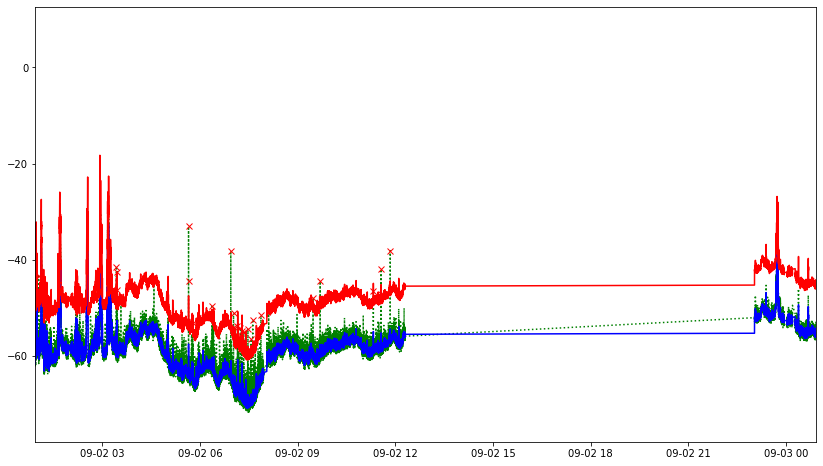

In [24]:
plt.figure(figsize=(14,8))
plt.plot(df['timestamp'], df['broadband_spl'], 'g:')
plt.plot(df['timestamp'], df['background_spl'], '-', color='b')
plt.plot(df['timestamp'], df['background_spl']+10, '-', color='r')
transient_mask = df['broadband_spl'] > (df['background_spl']+10)
plt.plot(df['timestamp'][transient_mask], df['broadband_spl'][transient_mask], 'rx')
plt.xlim(df['timestamp'].min()+ datetime.timedelta(days=1), df['timestamp'].min() + datetime.timedelta(days=2))

'''
for i in range(1, int(df['unix_time'].max()-df['unix_time'].min())//60**2):
    plt.axvline(df['timestamp'].min() + datetime.timedelta(seconds=i*60**2), ls='--')
'''
    
plt.show()

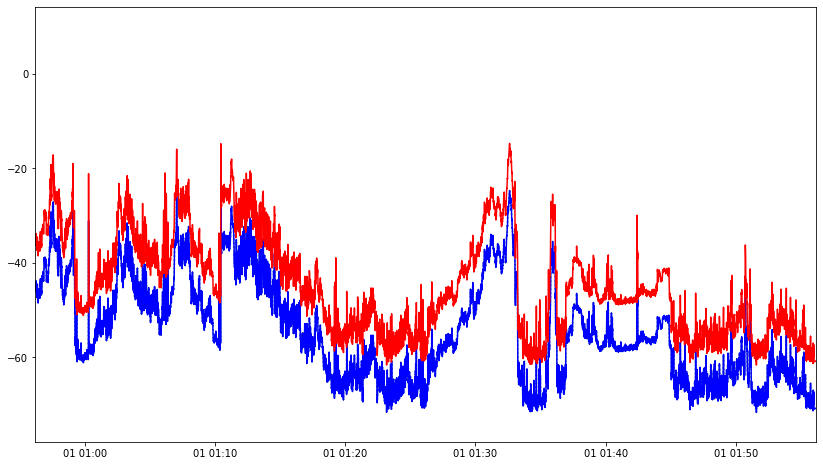

In [27]:
def plot_show_transient_events_relative_to_background(df, starttime_rel_to_df, duration):
    '''
    starttime_rel_to_df is start time relative to the start of the dataframe (pass as time delta)
    '''
    starttime = df['timestamp'].min() + starttime_rel_to_df
    endtime = starttime + duration

    plt.figure(figsize=(14,8))
    plt.plot(df['timestamp'], df['broadband_spl'], '-', color='b', label='broadband_spl')
    plt.plot(df['timestamp'], df['background_spl'], '-', color='r')
    transient_mask = df['broadband_spl'] > (df['broadband_spl']+10)
    plt.plot(df['timestamp'][transient_mask], df['broadband_spl'][transient_mask], 'rx')
    plt.xlim(starttime, endtime)
        
    plt.show()

starttime = datetime.timedelta()
duration = datetime.timedelta(hours=1)
plot_show_transient_events_relative_to_background(df, starttime, duration)